In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
os.listdir("../input/chest-xray-pneumonia/chest_xray")

len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))


## Data Visualization

In [10]:
train_dir = "Dataset/train"
test_dir = "Dataset/test"
val_dir = "Dataset/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print("PNEUMONIA:",num_pneumonia)
print("NORMAL:",num_normal)
print()


print("Test set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
print("PNEUMONIA:",num_pneumonia)
print("NORMAL:",num_normal)
print()

print("Validation set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
print("PNEUMONIA:",num_pneumonia)
print("NORMAL:",num_normal)

Train set:
PNEUMONIA: 3875
NORMAL: 1341

Test set:
PNEUMONIA: 390
NORMAL: 234

Validation set:
PNEUMONIA: 8
NORMAL: 8


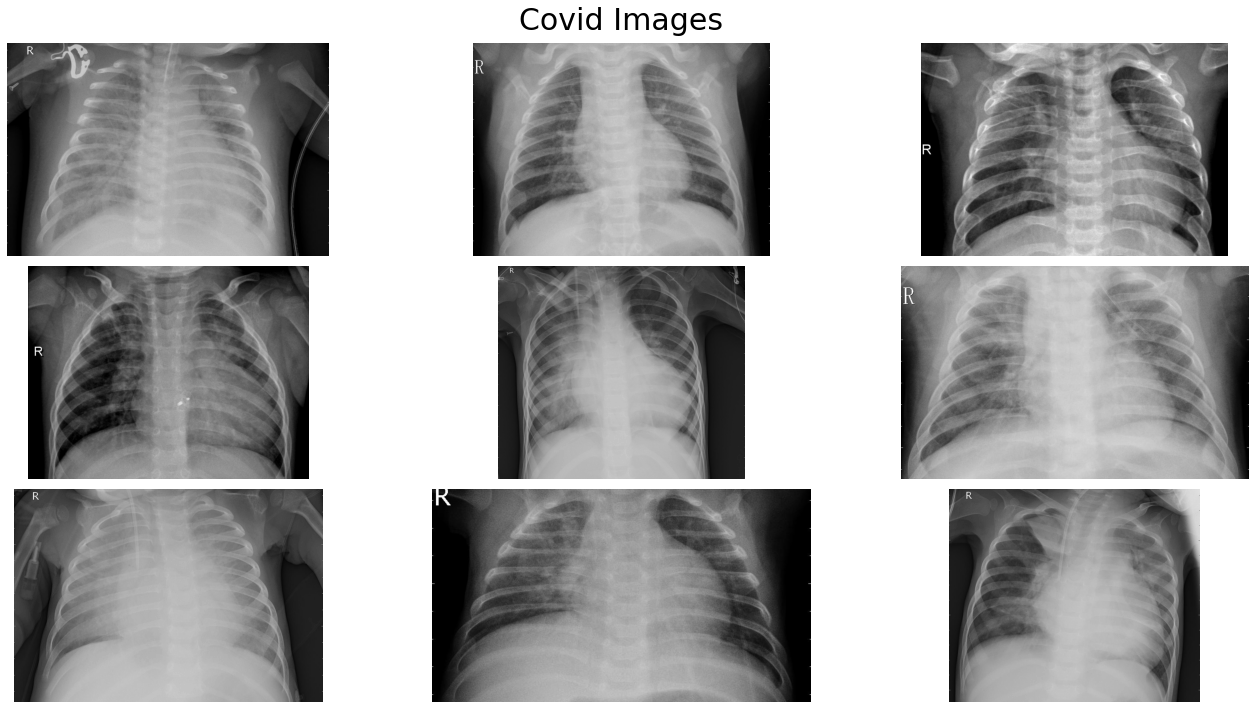

In [22]:
## Visualization of images from covid

pneumonia = os.listdir("Dataset/train/PNEUMONIA")
pneumonia_dir = "Dataset/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.suptitle("Covid Images",fontsize=30)
plt.tight_layout()

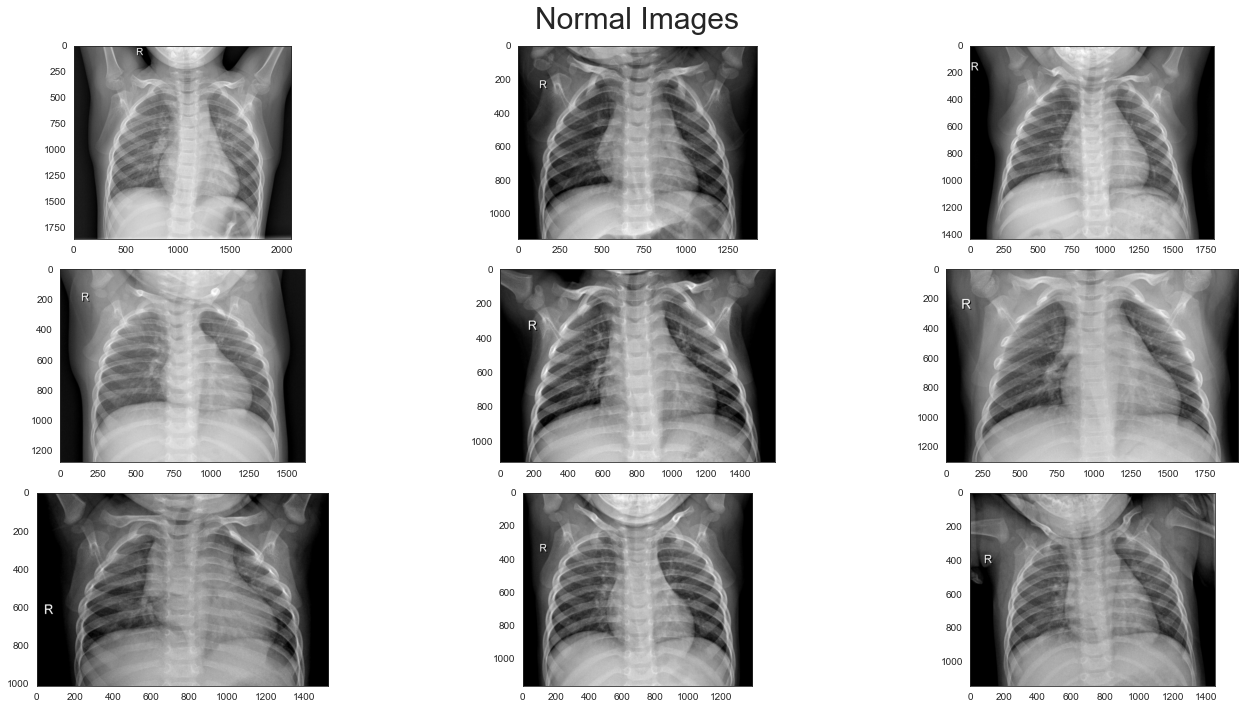

In [42]:
## Visualization of images from normal

normal = os.listdir("Dataset/train/NORMAL")
normal_dir = "Dataset/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    #plt.axis('off')
    
plt.suptitle("Normal Images",fontsize=30)
plt.tight_layout()

The dimensions of the image are 1858 pixels width and 2090 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 128.9075 and the standard deviation is 62.3010


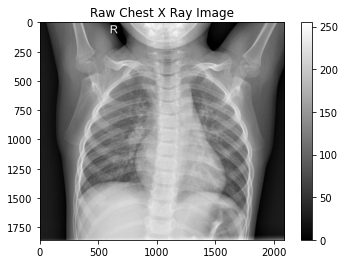

In [23]:
normal_img = os.listdir("Dataset/train/NORMAL")[0]
normal_dir = "Dataset/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

## Ivestigate pixel value distribution

E:\program files\anaconda3\envs\tenserfolw\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

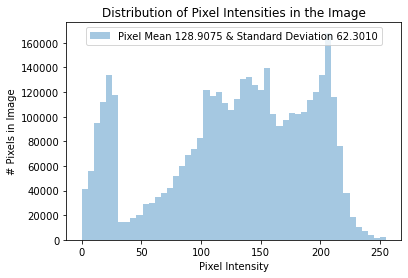

In [24]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

##  Image Preprocessing

In [25]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [27]:



train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
x = train[0][0]
print(len(train))
np.shape(train)

652


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.2578 and the minimum is -3.5289
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


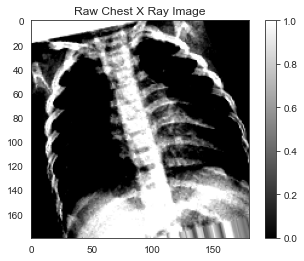

In [29]:



sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")




sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')





## Model

In [30]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

In [31]:
base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29089792/29084464 [==============================] - 32s 1us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
______________________

In [32]:



layers = base_model.layers
print(f"The model has {len(layers)} layers")



print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The model has 428 layers
The input shape Tensor("input_1:0", shape=(None, 180, 180, 3), dtype=float32)
The output shape Tensor("avg_pool/Mean:0", shape=(None, 1024), dtype=float32)


In [33]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [37]:
model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    steps_per_epoch=1,#change to 100
    validation_steps=25,
)

Epoch 1/10
1/1 [==============================] - 1s 926ms/step - loss: 0.1380 - accuracy: 1.0000 - val_loss: 1.9929 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0816 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.1741 - accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4278 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.7962 - accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5225 - accuracy: 0.8750
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3534 - accuracy: 0.8750
Epoch 8/10
1/1 [==============================] - 0s 18ms/step - loss: 0.1035 - accuracy: 0.8750
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.1779 - accuracy: 0.8750
Epoch 10/10
1/1 [==============================] - 0s 18ms/step - loss: 0.4055 - accura

In [41]:
print(model)

In [ ]:



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')



evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")